# Network Citations

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import igraph as ig
import numpy as np

import collections
import xnetwork as xn

import powerlaw

In [3]:
unarxiv_df = pd.read_csv('unarxiv_context_citations_labels.csv')
unarxiv_info = pd.read_csv('unarxiv_info.csv')

/tmp/ipykernel_5044/1303435263.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  unarxiv_df = pd.read_csv('unarxiv_context_citations_labels.csv')


In [4]:
unarxiv_df.head()

,id,discipline,bib_entries,section,text,cited_ids,intent,intent_int,label
0,1806.07088,Physics,{'cd78a4ae173f1a59f0049c6a4253216f85de6508': {...,Introduction,The [mathematical_formula] pair production fr...,"['0708.1471', '1607.02055']",unknown,6,background
1,1806.07088,Physics,{'cd78a4ae173f1a59f0049c6a4253216f85de6508': {...,Introduction,The available electric field strength for the ...,['0808.2107'],unknown,6,background
2,1806.07088,Physics,{'cd78a4ae173f1a59f0049c6a4253216f85de6508': {...,Introduction,"On the other hand, using the realistic focused...","['1003.2623', '1007.1099', 'hep-ph/0409301', '...",unknown,6,background
3,1806.07088,Physics,{'cd78a4ae173f1a59f0049c6a4253216f85de6508': {...,Methodology for calculating {{formula:e02d9895...,Assuming the validity of a locally constant fi...,['1003.2623'],unknown,6,method
4,1806.07088,Physics,{'cd78a4ae173f1a59f0049c6a4253216f85de6508': {...,Methodology for calculating {{formula:e02d9895...,where [mathematical_formula] is the magnitude...,['1003.2623'],unknown,6,background


In [5]:
unarxiv_df.drop(columns=['intent', 'intent_int', 'bib_entries'], axis=1, inplace=True)

In [6]:
unarxiv_df.to_csv('citation-network/data/unarxiv_context_citations_labels.csv', index=False)

In [5]:
unarxiv_info.discipline.value_counts()

discipline
Computer Science                              188164
Physics                                        80776
Mathematics                                    41803
Materials Science                               2928
Electrical Engineering and Systems Science       830
Statistics                                       547
Chemistry                                        432
Economics                                        202
Geology                                          127
Psychology                                        97
Environmental Science                             57
Quantitative Biology                              51
Philosophy                                        48
Medicine                                          45
Biology                                           38
Business                                          31
Engineering                                       28
Geography                                         20
Political Science                  

In [6]:
unarxiv_info.head(1)

,id,title,discipline
0,1806.07088,Phase control of Schwinger pair production by ...,Physics


In [7]:
unarxiv_df.label.value_counts()

label
background    85535
method        59272
result         4568
Name: count, dtype: int64

In [8]:
#unarxiv_df[unarxiv_df.section=="Introduction"].label.value_counts()

In [9]:
#result_examples = unarxiv_df[(unarxiv_df.section=="Introduction") & (unarxiv_df.label=="result")].sample(5, random_state=42)

In [10]:
unarxiv_df['cited_ids'] = unarxiv_df.cited_ids.apply(eval)

In [11]:
unarxiv_df = unarxiv_df.explode('cited_ids')

In [12]:
unarxiv_df['cited_ids'] = unarxiv_df['cited_ids'].astype(str)
unarxiv_df['id'] = unarxiv_df['id'].astype(str)

In [13]:
unarxiv_df.drop_duplicates(inplace=True)

In [14]:
unarxiv_df.head()

,id,discipline,section,text,cited_ids,label
0,1806.07088,Physics,Introduction,The [mathematical_formula] pair production fr...,0708.1471,background
0,1806.07088,Physics,Introduction,The [mathematical_formula] pair production fr...,1607.02055,background
1,1806.07088,Physics,Introduction,The available electric field strength for the ...,0808.2107,background
2,1806.07088,Physics,Introduction,"On the other hand, using the realistic focused...",1003.2623,background
2,1806.07088,Physics,Introduction,"On the other hand, using the realistic focused...",1007.1099,background


In [15]:
unarxiv_df.shape

(303372, 6)

In [16]:
len(list(set(unarxiv_df.id) & set(unarxiv_df.cited_ids)))

5156

## Original network (With all data)

In [17]:
df_filtered = unarxiv_df

In [18]:
df_filtered.shape

(303372, 6)

In [19]:
#intersection = list(set(df_filtered["cited_ids"].values).intersection(df_filtered["id"].values))
#
#papers_top = []
#papers_sub = []
#for idx in range(0,len(df_filtered)):
#    if (df_filtered["cited_ids"].iloc[idx] in intersection):
#        papers_top.append(df_filtered["cited_ids"].iloc[idx])
#        papers_sub.append(df_filtered["id"].iloc[idx])
#
#df = pd.DataFrame({'top':papers_top, 'sub':papers_sub})
#df['sub'].nunique()

In [20]:
#ids_citations = df['top'].values.tolist() + df['sub'].values.tolist()
#len(ids_citations)
#pd.DataFrame(ids_citations, columns=['ids']).to_csv('unarxiv_ids.csv', index=False)

In [21]:
#GG = nx.from_pandas_edgelist(df, source="top",
#                              target="sub", edge_attr=None,
#                              create_using=nx.DiGraph())

In [22]:
GG = nx.from_pandas_edgelist(df_filtered, 
                             source="id",
                             target="cited_ids", 
                             # edge_attr="label", 
                             edge_key="label",
                              create_using=nx.DiGraph())

In [23]:
print(GG)

DiGraph with 76640 nodes and 171403 edges


In [24]:
#nx.degree_centrality(GG)

In [25]:
#g = ig.Graph.from_networkx(GG)
#xn.save(g,"unarxiv_all_without_method.xnet")

In [26]:
GG_cc = max(nx.weakly_connected_components(GG), key=len)
GG = GG.subgraph(GG_cc)

In [27]:
print(GG)

DiGraph with 71939 nodes and 165615 edges


In [28]:
g = ig.Graph.from_networkx(GG)
xn.save(g,"unarxiv_weakly_connected.xnet")

## In-degree distribution and fitting by a power-law distribution 

In [29]:
# Calculating the in-degree

GGs = [d for d in list(set(list(GG.nodes)))]
GGs_in_degrees = [GG.in_degree[d] for d in GGs]

GGs_in_order = [x for y, x in sorted(zip(GGs_in_degrees, GGs), reverse=True)]
GGs_in_degrees_order = sorted((GG.in_degree[d] for d in GGs), reverse=True)

In [32]:
degree_count = collections.Counter(GGs_in_degrees_order)

In [33]:
deg, cnt = zip(*degree_count.items())

/tmp/ipykernel_11157/536027455.py:1: RuntimeWarning: divide by zero encountered in log
  log_deg = np.log(deg)


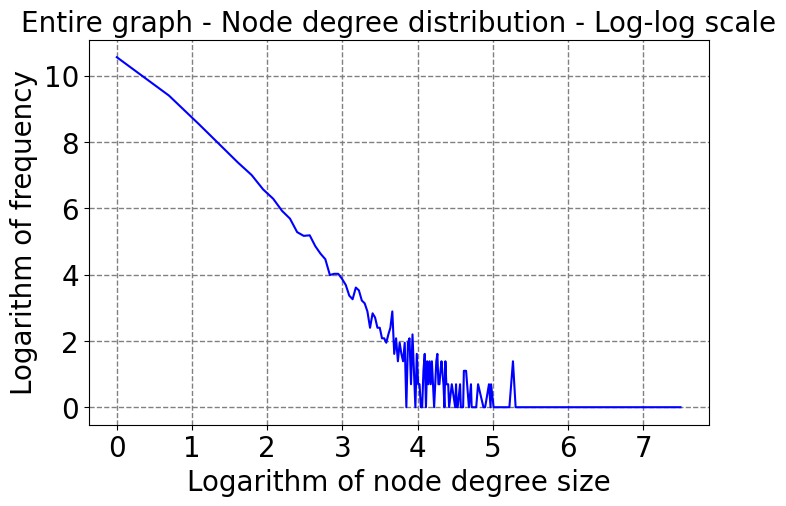

In [34]:
log_deg = np.log(deg)
log_cnt = np.log(cnt)

plt.figure(figsize=(8,5))

plt.plot(log_deg, log_cnt, color='b')
plt.xlabel('Logarithm of node degree size', fontsize=20)
plt.ylabel('Logarithm of frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node degree distribution - Log-log scale", fontsize=20)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.rc('axes', axisbelow=True)
plt.show()

In [35]:
in_degree_sequence = sorted([d for n, d in GG.in_degree()], reverse=True) 

fit = powerlaw.Fit(in_degree_sequence) 

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [36]:
print("alpha:", round(fit.power_law.alpha,3))
print("Kmin:", round(fit.power_law.xmin,3))

alpha: 2.719
Kmin: 10.0


In [37]:
print("Intercept:", round(np.log((fit.power_law.alpha-1)/fit.power_law.xmin),3))
print("Slope:", round(-1*fit.power_law.alpha,3))

Intercept: -1.761
Slope: -2.719


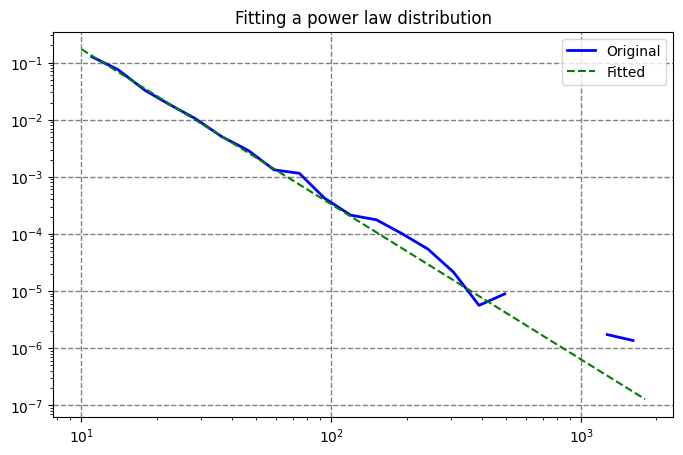

In [38]:
# Plotting the fitted a power law distribution

plt.figure(figsize=(8, 5))
fig2 = fit.plot_pdf(color='b', linewidth=2, label='Original')
fig2 = fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2, label='Fitted')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title("Fitting a power law distribution")
plt.rc('axes', axisbelow=True)
plt.legend()

In [39]:
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print("R:", R)
print("p:", p)

R: 5.7612462824398145
p: 8.349510197763547e-09


### Out-degree distribution and fitting by a power-law distribution

In [40]:
GGs = [d for d in list(set(list(GG.nodes)))]
GGs_out_degrees = [GG.out_degree[d] for d in GGs]

GGs_out_order = [x for y, x in sorted(zip(GGs_out_degrees, GGs), reverse=True)]
GGs_out_degrees_order = sorted((GG.out_degree[d] for d in GGs), reverse=True)

In [41]:
degree_count = collections.Counter(GGs_out_degrees_order)

In [42]:
deg, cnt = zip(*degree_count.items())

/tmp/ipykernel_11157/536027455.py:1: RuntimeWarning: divide by zero encountered in log
  log_deg = np.log(deg)


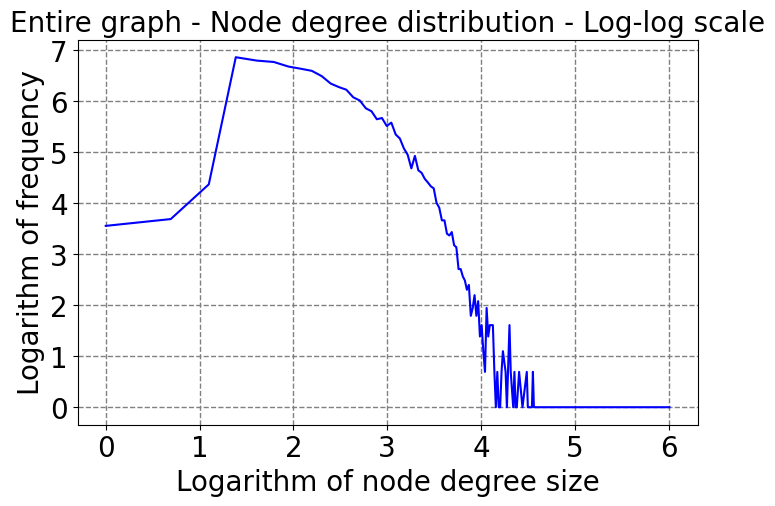

In [43]:
log_deg = np.log(deg)
log_cnt = np.log(cnt)

plt.figure(figsize=(8,5))

plt.plot(log_deg, log_cnt, color='b')
plt.xlabel('Logarithm of node degree size', fontsize=20)
plt.ylabel('Logarithm of frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node degree distribution - Log-log scale", fontsize=20)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.rc('axes', axisbelow=True)
plt.show()

In [44]:
out_degree_sequence = sorted([d for n, d in GG.out_degree()], reverse=True) 

fit = powerlaw.Fit(out_degree_sequence) 

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [45]:
print("alpha:", round(fit.power_law.alpha,3))
print("Kmin:", round(fit.power_law.xmin,3))

alpha: 4.957
Kmin: 31.0


In [46]:
print("Intercept:", round(np.log((fit.power_law.alpha-1)/fit.power_law.xmin),3))
print("Slope:", round(-1*fit.power_law.alpha,3))

Intercept: -2.059
Slope: -4.957


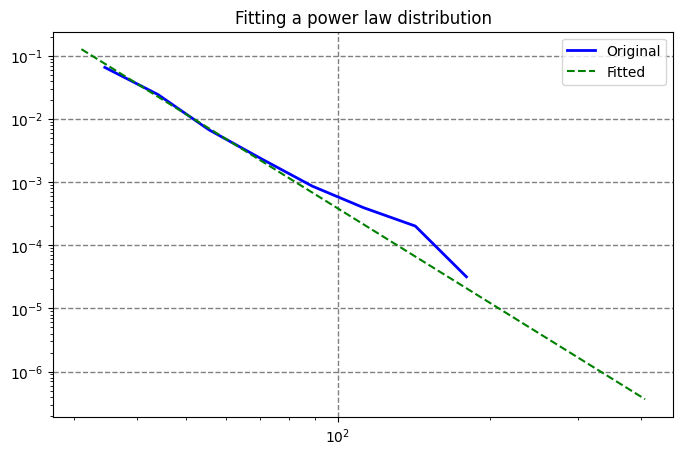

In [47]:
plt.figure(figsize=(8, 5))
fig2 = fit.plot_pdf(color='b', linewidth=2, label='Original')
fig2 = fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2, label='Fitted')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title("Fitting a power law distribution")
plt.rc('axes', axisbelow=True)
plt.legend()

In [48]:
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print("R:", R)
print("p:", p)

R: 3.3669106720390642
p: 0.0007601530687293312


In [37]:
## The direction of the arrow indicates flow of information 
## from the cited paper (beginning of the arrow) to the citing paper (end of the arrow)
#
#spring_pos = nx.spring_layout(GG) # might take a little while
#fig = plt.figure(figsize = (40, 30))
#ax = fig.add_subplot(111)
#ax.axis('off')
#
#nx.draw_networkx(GG, spring_pos, ax = ax, node_size = 10, width = 1, with_labels = False)
#plt.title("Entire graph - Default node size")
#plt.close();
#
#fig

### Best centrality for find the 10 most influential papers in UnarXiv

In [50]:
def sorting(cetralts, n_tops):
    cetralts_tops = sorted(cetralts.items(), key=lambda item: item[1], reverse=True)[:n_tops]
    return cetralts_tops

In [54]:
def infos(centrs_tops):
    top_i = 1
    for idd,val in centrs_tops:
        print("Top",str(top_i), ", Id arXiv:", idd, ", Centrality:",round(val,4))
        print(f"Title: {unarxiv_info[unarxiv_info["id"]==idd]["title"].values[0]}", "\n")
        print(f"Discipline: {unarxiv_info[unarxiv_info["id"]==idd]["discipline"].values[0]}", "\n")
        top_i += 1

In [60]:
def draw(G, pos, measures, measure_name):
    
    plt.figure(figsize = (40, 30))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=90, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

### PageRank

In [56]:
page_rank = nx.pagerank(GG, alpha = 0.85)
page_rank_tops = sorting(page_rank, 10)
infos(page_rank_tops)

Top 1 , Id arXiv: 1512.03385 , Centrality: 0.0016
Title: K. He, X. Zhang, S. Ren, and J. Sun, “Deep residual learning for image recognition,” in Proceedings of the IEEE conference on computer vision and pattern recognition, 2016, pp. 770–778. 

Discipline: Computer Science 

Top 2 , Id arXiv: 1412.6980 , Centrality: 0.0013
Title: D. Kingma and J. Ba, “Adam: A method for stochastic optimization,” arXiv preprint arXiv:1412.6980, 2014. 

Discipline: Computer Science 

Top 3 , Id arXiv: 1505.04597 , Centrality: 0.0005
Title: O. Ronneberger, P. Fischer, and T. Brox, “U-net: Convolutional networks for biomedical image segmentation,” in International Conference on Medical image computing and computer-assisted intervention. Springer, 2015, pp. 234–241. 

Discipline: Computer Science 

Top 4 , Id arXiv: 1911.05722 , Centrality: 0.0004
Title: K. He, H. Fan, Y. Wu, S. Xie, and R. Girshick. Momentum contrast for unsupervised visual representation learning. arXiv preprint arXiv:1911.05722, 2019. 



### In and Out centrality

In [57]:
in_deg = nx.in_degree_centrality(GG)
in_deg_tops = sorting(in_deg, 10)
infos(in_deg_tops)

Top 1 , Id arXiv: 1512.03385 , Centrality: 0.025
Title: K. He, X. Zhang, S. Ren, and J. Sun, “Deep residual learning for image recognition,” in Proceedings of the IEEE conference on computer vision and pattern recognition, 2016, pp. 770–778. 

Discipline: Computer Science 

Top 2 , Id arXiv: 1412.6980 , Centrality: 0.0183
Title: D. Kingma and J. Ba, “Adam: A method for stochastic optimization,” arXiv preprint arXiv:1412.6980, 2014. 

Discipline: Computer Science 

Top 3 , Id arXiv: 1505.04597 , Centrality: 0.0076
Title: O. Ronneberger, P. Fischer, and T. Brox, “U-net: Convolutional networks for biomedical image segmentation,” in International Conference on Medical image computing and computer-assisted intervention. Springer, 2015, pp. 234–241. 

Discipline: Computer Science 

Top 4 , Id arXiv: 1506.01497 , Centrality: 0.0065
Title: Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. IEEE Transactions on Pattern Analysi

In [58]:
out_deg = nx.out_degree_centrality(GG)
out_deg_tops = sorting(out_deg, 10)
infos(out_deg_tops)

Top 1 , Id arXiv: 2006.16182 , Centrality: 0.0057
Title: The First Three Seconds: a Review of Possible Expansion Histories of the
  Early Universe 

Discipline: Physics 

Top 2 , Id arXiv: 2206.09474 , Centrality: 0.0026
Title: 3D Object Detection for Autonomous Driving: A Review and New Outlooks 

Discipline: Computer Science 

Top 3 , Id arXiv: 2101.11695 , Centrality: 0.002
Title: Design of Light-Matter Interactions for Quantum Technologies 

Discipline: Physics 

Top 4 , Id arXiv: 2202.01819 , Centrality: 0.0019
Title: Mesoscopic physics of nanomechanical systems 

Discipline: Physics 

Top 5 , Id arXiv: 2206.05535 , Centrality: 0.0019
Title: Chirality as Generalized Spin-Orbit Interaction in Spintronics 

Discipline: Physics 

Top 6 , Id arXiv: 2112.05989 , Centrality: 0.0018
Title: An Overview of Signal Processing Techniques for RIS/IRS-aided Wireless
  Systems 

Discipline: Electrical Engineering and Systems Science 

Top 7 , Id arXiv: 2105.12176 , Centrality: 0.0018
Title: Inte

### Eigenvector centrality

In [62]:
eig = nx.eigenvector_centrality(GG, max_iter=600)
eig_tops = sorting(eig, 10)
infos(eig_tops)

Top 1 , Id arXiv: 1911.05722 , Centrality: 0.1983
Title: K. He, H. Fan, Y. Wu, S. Xie, and R. Girshick. Momentum contrast for unsupervised visual representation learning. arXiv preprint arXiv:1911.05722, 2019. 

Discipline: Computer Science 

Top 2 , Id arXiv: 1902.06162 , Centrality: 0.1983
Title: L. Jing and Y. Tian. Self-supervised visual feature learning with deep neural networks: A survey. arXiv preprint arXiv:1902.06162, 2019. 

Discipline: Computer Science 

Top 3 , Id arXiv: 2009.10273 , Centrality: 0.1642
Title: Yizhu Jiao, Yun Xiong, Jiawei Zhang, Yao Zhang, Tianqi Zhang, and Yangyong Zhu. Sub-graph contrast for scalable self-supervised graph representation learning. In ICDM, pages 222–231. IEEE, 2020. 

Discipline: Computer Science 

Top 4 , Id arXiv: 1603.08511 , Centrality: 0.1502
Title: Zhang, R., Isola, P., Efros, A.A.: Colorful image colorization. In: Proc. the European Conference on Computer Vision (ECCV) (2016) 

Discipline: Computer Science 

Top 5 , Id arXiv: 1603.0

### Betweeness centrality

In [70]:
%%time
# demora muito a rodar
#betw = nx.betweenness_centrality(GG)
#betw_tops = sorting(betw, 10)
#infos(betw_tops)

CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 7.39 μs


### Katz centrality

In [64]:
katz = nx.katz_centrality(GG, alpha=0.1, beta=1.0)
katz_tops = sorting(katz, 10)
infos(katz_tops)

Top 1 , Id arXiv: 1512.03385 , Centrality: 0.4439
Title: K. He, X. Zhang, S. Ren, and J. Sun, “Deep residual learning for image recognition,” in Proceedings of the IEEE conference on computer vision and pattern recognition, 2016, pp. 770–778. 

Discipline: Computer Science 

Top 2 , Id arXiv: 1412.6980 , Centrality: 0.317
Title: D. Kingma and J. Ba, “Adam: A method for stochastic optimization,” arXiv preprint arXiv:1412.6980, 2014. 

Discipline: Computer Science 

Top 3 , Id arXiv: 1505.04597 , Centrality: 0.1361
Title: O. Ronneberger, P. Fischer, and T. Brox, “U-net: Convolutional networks for biomedical image segmentation,” in International Conference on Medical image computing and computer-assisted intervention. Springer, 2015, pp. 234–241. 

Discipline: Computer Science 

Top 4 , Id arXiv: 1506.01497 , Centrality: 0.1231
Title: Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. IEEE Transactions on Pattern Analysi

### Hub scores

In [65]:
hubs, authorities = nx.hits(GG, max_iter=600)
hubs_tops = sorting(hubs, 10)
infos(hubs_tops)

Top 1 , Id arXiv: 2211.07157 , Centrality: 0.0008
Title: ParCNetV2: Oversized Kernel with Enhanced Attention 

Discipline: Computer Science 

Top 2 , Id arXiv: 2103.10211 , Centrality: 0.0008
Title: Space-Time Crop & Attend: Improving Cross-modal Video Representation
  Learning 

Discipline: Computer Science 

Top 3 , Id arXiv: 2102.12122 , Centrality: 0.0008
Title: Pyramid Vision Transformer: A Versatile Backbone for Dense Prediction
  without Convolutions 

Discipline: Computer Science 

Top 4 , Id arXiv: 2206.09474 , Centrality: 0.0008
Title: 3D Object Detection for Autonomous Driving: A Review and New Outlooks 

Discipline: Computer Science 

Top 5 , Id arXiv: 2112.11435 , Centrality: 0.0008
Title: Learned Queries for Efficient Local Attention 

Discipline: Computer Science 

Top 6 , Id arXiv: 2205.13543 , Centrality: 0.0008
Title: Revealing the Dark Secrets of Masked Image Modeling 

Discipline: Computer Science 

Top 7 , Id arXiv: 2206.07298 , Centrality: 0.0008
Title: S$^2$-FPN:

### Authority scores

In [66]:
hubs, authorities = nx.hits(GG, max_iter=600)
authorities_tops = sorting(authorities, 10)
infos(authorities_tops)

Top 1 , Id arXiv: 1512.03385 , Centrality: 0.0372
Title: K. He, X. Zhang, S. Ren, and J. Sun, “Deep residual learning for image recognition,” in Proceedings of the IEEE conference on computer vision and pattern recognition, 2016, pp. 770–778. 

Discipline: Computer Science 

Top 2 , Id arXiv: 1412.6980 , Centrality: 0.0193
Title: D. Kingma and J. Ba, “Adam: A method for stochastic optimization,” arXiv preprint arXiv:1412.6980, 2014. 

Discipline: Computer Science 

Top 3 , Id arXiv: 1506.01497 , Centrality: 0.0086
Title: Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. IEEE Transactions on Pattern Analysis and Machine Intelligence 39(6) (June 2017) 1137–1149 

Discipline: Computer Science 

Top 4 , Id arXiv: 1505.04597 , Centrality: 0.008
Title: O. Ronneberger, P. Fischer, and T. Brox, “U-net: Convolutional networks for biomedical image segmentation,” in International Conference on Medical image computing and comput

### Harmonic centrality

In [67]:
harmonic = nx.harmonic_centrality(GG)
harmonic_tops = sorting(harmonic, 10)
infos(harmonic_tops)

Top 1 , Id arXiv: 1512.03385 , Centrality: 2458.5833
Title: K. He, X. Zhang, S. Ren, and J. Sun, “Deep residual learning for image recognition,” in Proceedings of the IEEE conference on computer vision and pattern recognition, 2016, pp. 770–778. 

Discipline: Computer Science 

Top 2 , Id arXiv: 1412.6980 , Centrality: 1955.35
Title: D. Kingma and J. Ba, “Adam: A method for stochastic optimization,” arXiv preprint arXiv:1412.6980, 2014. 

Discipline: Computer Science 

Top 3 , Id arXiv: 1505.04597 , Centrality: 854.5833
Title: O. Ronneberger, P. Fischer, and T. Brox, “U-net: Convolutional networks for biomedical image segmentation,” in International Conference on Medical image computing and computer-assisted intervention. Springer, 2015, pp. 234–241. 

Discipline: Computer Science 

Top 4 , Id arXiv: 1506.01497 , Centrality: 806.45
Title: Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. IEEE Transactions on Pattern 

In [69]:
data_tmp = {'page rank': list(dict(page_rank_tops).keys()),
            'in degree': list(dict(in_deg_tops).keys()), 
            'out degree': list(dict(out_deg_tops).keys()),
            #'closeness': list(dict(closeness_tops).keys()),
            'eigenvector': list(dict(eig_tops).keys()),
            #'betweeness': list(dict(betw_tops).keys()),
            'katz': list(dict(katz_tops).keys()),
            'hub scores': list(dict(hubs_tops).keys()),
            'authority scores': list(dict(authorities_tops).keys()),
            'harmonic': list(dict(harmonic_tops).keys())}
df_centralities_all = pd.DataFrame(data_tmp)
df_centralities_all

,page rank,in degree,out degree,eigenvector,katz,hub scores,authority scores,harmonic
0,1512.03385,1512.03385,2006.16182,1911.05722,1512.03385,2211.07157,1512.03385,1512.03385
1,1412.6980,1412.6980,2206.09474,1902.06162,1412.6980,2103.10211,1412.6980,1412.6980
2,1505.04597,1505.04597,2101.11695,2009.10273,1505.04597,2102.12122,1506.01497,1505.04597
3,1911.05722,1506.01497,2202.01819,1603.08511,1506.01497,2206.09474,1505.04597,1506.01497
4,1506.01497,1911.05722,2206.05535,1603.09246,1911.05722,2112.11435,1911.05722,1911.05722
5,1411.4038,2103.14030,2112.05989,1604.07379,2005.12872,2205.13543,2103.14030,1411.4038
6,2005.12872,2005.12872,2105.12176,2011.10566,1612.03144,2206.07298,1612.03144,1612.03144
7,2103.14030,1612.03144,2205.10766,1807.05520,2103.14030,2203.15102,2005.12872,2005.12872
8,1608.06993,1411.4038,2210.17545,2006.08218,1411.4038,2205.13515,1411.4038,1709.01507
9,1703.10593,1703.10593,2112.11948,2002.01169,1801.03924,2111.03056,1608.06993,1608.06993


In [ ]:
df_centralities_all.to_csv("df_centralities_all.csv", index=False)

### Background Filtered

In [72]:
df_filtered = unarxiv_df[unarxiv_df.label!='background']

In [73]:
GG = nx.from_pandas_edgelist(df_filtered, 
                             source="id",
                             target="cited_ids", 
                             # edge_attr="label", 
                             edge_key="label",
                              create_using=nx.DiGraph())

In [74]:
print(GG)

DiGraph with 37644 nodes and 65739 edges


In [75]:
#nx.degree_centrality(GG)

In [76]:
#g = ig.Graph.from_networkx(GG)
#xn.save(g,"unarxiv_all_without_method.xnet")

In [77]:
GG_cc = max(nx.weakly_connected_components(GG), key=len)
GG = GG.subgraph(GG_cc)

In [78]:
print(GG)

DiGraph with 24827 nodes and 54118 edges


In [98]:
g = ig.Graph.from_networkx(GG)
xn.save(g,"unarxiv_weakly_connected_wo_background.xnet")

### PageRank

In [88]:
page_rank = nx.pagerank(GG, alpha = 0.85)
page_rank_tops = sorting(page_rank, 10)
#infos(page_rank_tops)

### In and Out centrality

In [89]:
in_deg = nx.in_degree_centrality(GG)
in_deg_tops = sorting(in_deg, 10)
#infos(in_deg_tops)

In [90]:
out_deg = nx.out_degree_centrality(GG)
out_deg_tops = sorting(out_deg, 10)
#infos(out_deg_tops)

### Eigenvector centrality

In [91]:
eig = nx.eigenvector_centrality(GG, max_iter=600)
eig_tops = sorting(eig, 10)
#infos(eig_tops)

### Katz centrality

In [92]:
katz = nx.katz_centrality(GG, alpha=0.1, beta=1.0)
katz_tops = sorting(katz, 10)
#infos(katz_tops)

### Hub scores

In [93]:
hubs, authorities = nx.hits(GG, max_iter=600)
hubs_tops = sorting(hubs, 10)
#infos(hubs_tops)

### Authority scores

In [94]:
hubs, authorities = nx.hits(GG, max_iter=600)
authorities_tops = sorting(authorities, 10)
#infos(authorities_tops)

### Harmonic centrality

In [95]:
harmonic = nx.harmonic_centrality(GG)
harmonic_tops = sorting(harmonic, 10)
#infos(harmonic_tops)

In [96]:
data_tmp = {'page rank': list(dict(page_rank_tops).keys()),
            'in degree': list(dict(in_deg_tops).keys()), 
            'out degree': list(dict(out_deg_tops).keys()),
            #'closeness': list(dict(closeness_tops).keys()),
            'eigenvector': list(dict(eig_tops).keys()),
            #'betweeness': list(dict(betw_tops).keys()),
            'katz': list(dict(katz_tops).keys()),
            'hub scores': list(dict(hubs_tops).keys()),
            'authority scores': list(dict(authorities_tops).keys()),
            'harmonic': list(dict(harmonic_tops).keys())}
df_centralities_wo_background= pd.DataFrame(data_tmp)
df_centralities_wo_background

,page rank,in degree,out degree,eigenvector,katz,hub scores,authority scores,harmonic
0,1412.6980,1512.03385,2206.09474,1410.5926,1512.03385,2211.07157,1512.03385,1512.03385
1,1512.03385,1412.6980,2205.10766,1406.2807,1412.6980,2206.07298,1412.6980,1412.6980
2,1505.04597,1505.04597,2210.17545,1408.5418,1505.04597,2204.08412,1505.04597,1505.04597
3,1506.01497,1506.01497,2208.07422,2002.01169,1506.01497,2212.00776,1506.01497,1506.01497
4,1911.05722,1911.05722,2110.00111,1210.7389,1911.05722,2209.06993,1612.03144,1612.03144
5,1608.06993,1612.03144,2205.10587,1809.11101,1612.03144,2106.13365,1911.05722,1911.05722
6,2103.14030,2103.14030,2105.12176,1710.06788,1801.03924,2112.11435,2103.14030,1801.03924
7,1612.03144,1801.03924,2208.04309,1806.00350,2103.14030,2111.08892,1604.01685,1709.01507
8,1801.03924,1604.01685,1110.6008,2011.10566,2005.12872,2101.04704,1801.03924,2005.12872
9,1710.09412,2005.12872,2112.15439,1807.05520,1604.01685,2204.01278,2005.12872,2103.14030


In [97]:
df_centralities_wo_background.to_csv("df_centralities_wo_background.csv", index=False)